<a href="https://colab.research.google.com/github/Akshajaease123/ImageProcessingCPUvsGPU/blob/main/parallelProgramming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import torch
import time

In [ ]:
import os
import zipfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return torch.tensor(image, dtype=torch.float32, device='cuda')

In [ ]:
def sobel_edge_detection(image):
    sobelx = torch.nn.functional.conv2d(image.unsqueeze(0).unsqueeze(0),
                                        torch.tensor([[[[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]]], dtype=torch.float32, device='cuda'))
    sobely = torch.nn.functional.conv2d(image.unsqueeze(0).unsqueeze(0),
                                        torch.tensor([[[[-1, -2, -1], [0, 0, 0], [1, 2, 1]]]], dtype=torch.float32, device='cuda'))
    edge_detected = torch.sqrt(sobelx**2 + sobely**2).squeeze().cpu().numpy()
    return edge_detected

In [ ]:
def process_all_images(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(".tif")]
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        image = load_image(image_path)

        start_time = time.time()
        processed_image = sobel_edge_detection(image)
        end_time = time.time()

        print(f"Processed {image_file} in {end_time - start_time:.2f} seconds")

        output_path = os.path.join(folder_path, "processed_" + image_file)
        cv2.imwrite(output_path, processed_image.astype(np.uint8))

In [ ]:
import cv2
import numpy as np
import torch
import time
import os
import zipfile
import matplotlib.pyplot as plt
from google.colab import drive

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


# Load image
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error loading image: {image_path}")
    return torch.tensor(image, dtype=torch.float32) if image is not None else None

# Sobel edge detection function
def sobel_edge_detection(image, device):
    image = image.to(device)
    sobelx = torch.nn.functional.conv2d(image.unsqueeze(0).unsqueeze(0),
                                        torch.tensor([[[[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]]], dtype=torch.float32, device=device))
    sobely = torch.nn.functional.conv2d(image.unsqueeze(0).unsqueeze(0),
                                        torch.tensor([[[[-1, -2, -1], [0, 0, 0], [1, 2, 1]]]], dtype=torch.float32, device=device))
    edge_detected = torch.sqrt(sobelx**2 + sobely**2).squeeze().cpu().numpy()
    return edge_detected

# Process all .tif images in the extracted folder
def process_all_images(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(".tif")]
    print(f"Found {len(image_files)} .tif images.")

    if not image_files:
        print("No .tif images found. Check extraction path!")
        return

    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        print(f"Processing: {image_path}")
        image = load_image(image_path)

        if image is None:
            continue

        # CPU Processing
        start_cpu = time.time()
        processed_cpu = sobel_edge_detection(image, "cpu")
        end_cpu = time.time()
        cpu_time = end_cpu - start_cpu

        # GPU Processing (if available)
        if torch.cuda.is_available():
            start_gpu = time.time()
            processed_gpu = sobel_edge_detection(image, "cuda")
            end_gpu = time.time()
            gpu_time = end_gpu - start_gpu
            print(f"CPU Time: {cpu_time:.4f}s | GPU Time: {gpu_time:.4f}s (Speedup: {cpu_time/gpu_time:.2f}x)")
        else:
            processed_gpu = None
            print(f"CPU Time: {cpu_time:.4f}s | No GPU available.")

        # Save processed images
        output_path_cpu = os.path.join(folder_path, "processed_cpu_" + image_file)
        cv2.imwrite(output_path_cpu, processed_cpu.astype(np.uint8))

        if processed_gpu is not None:
            output_path_gpu = os.path.join(folder_path, "processed_gpu_" + image_file)
            cv2.imwrite(output_path_gpu, processed_gpu.astype(np.uint8))

        # Display original and processed images
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(image.cpu().numpy(), cmap='gray')
        plt.title("Original")

        plt.subplot(1, 3, 2)
        plt.imshow(processed_cpu, cmap='gray')
        plt.title("CPU Processed")

        if processed_gpu is not None:
            plt.subplot(1, 3, 3)
            plt.imshow(processed_gpu, cmap='gray')
            plt.title("GPU Processed")

        plt.show()

if __name__ == "__main__":
    process_all_images('/content/drive/MyDrive/parallelprogrammingdata/extracter/DIP3E_Original_Images_CH01/DIP3E_Original_Images_CH01')

Using device: cuda


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/parallelprogrammingdata/extracter/DIP3E_Original_Images_CH01/DIP3E_Original_Images_CH01'

Using device: cuda
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 434 .tif images.
Processing: /content/drive/MyDrive/DIP3E_CH01_Original_Images/DIP3E_Original_Images_CH01/processed_cpu_Fig0112(0)(small-gray-map-americas).tif
CPU Time: 0.0094s | GPU Time: 0.0031s (Speedup: 3.02x)
Processing: /content/drive/MyDrive/DIP3E_CH01_Original_Images/DIP3E_Original_Images_CH01/processed_gpu_Fig0112(0)(small-gray-map-americas).tif
CPU Time: 0.0070s | GPU Time: 0.0027s (Speedup: 2.58x)
Processing: /content/drive/MyDrive/DIP3E_CH01_Original_Images/DIP3E_Original_Images_CH01/processed_cpu_Fig0113(0)(small-gray-map-europe-russia-etc).tif
CPU Time: 0.0207s | GPU Time: 0.0044s (Speedup: 4.74x)
Processing: /content/drive/MyDrive/DIP3E_CH01_Original_Images/DIP3E_Original_Images_CH01/processed_gpu_Fig0113(0)(small-gray-map-europe-russia-etc).tif
CPU Time: 0.0093s | GPU Time: 0.0042s (Speedup: 2.20x)
Processing: /conten

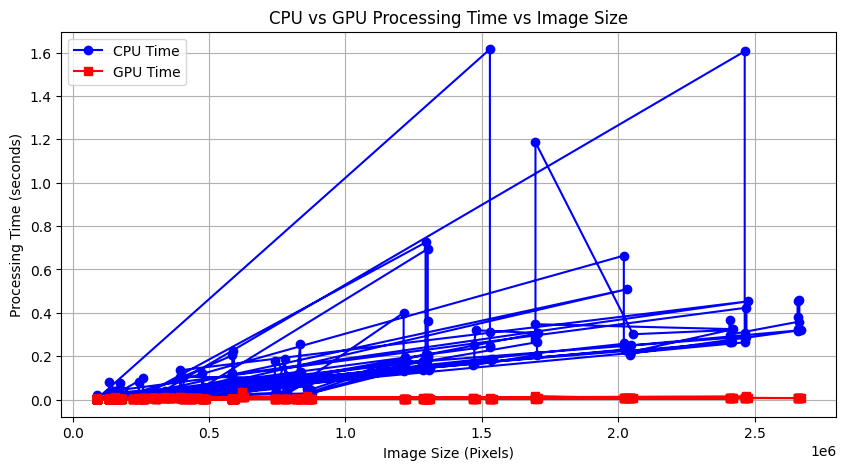

In [ ]:
import cv2
import numpy as np
import torch
import time
import os
import matplotlib.pyplot as plt
from google.colab import drive

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Mount Google Drive
drive.mount('/content/drive')

# Load image
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error loading image: {image_path}")
    return torch.tensor(image, dtype=torch.float32) if image is not None else None

# Sobel edge detection function
def sobel_edge_detection(image, device):
    image = image.to(device)
    sobelx = torch.nn.functional.conv2d(image.unsqueeze(0).unsqueeze(0),
                                        torch.tensor([[[[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]]], dtype=torch.float32, device=device))
    sobely = torch.nn.functional.conv2d(image.unsqueeze(0).unsqueeze(0),
                                        torch.tensor([[[[-1, -2, -1], [0, 0, 0], [1, 2, 1]]]], dtype=torch.float32, device=device))
    edge_detected = torch.sqrt(sobelx**2 + sobely**2).squeeze().cpu().numpy()
    return edge_detected

# Function to plot processing time comparison
def plot_processing_times(cpu_times, gpu_times, image_sizes):
    plt.figure(figsize=(10, 5))
    plt.plot(image_sizes, cpu_times, label="CPU Time", marker='o', color='blue')
    plt.plot(image_sizes, gpu_times, label="GPU Time", marker='s', color='red')
    plt.xlabel("Image Size (Pixels)")
    plt.ylabel("Processing Time (seconds)")
    plt.title("CPU vs GPU Processing Time vs Image Size")
    plt.legend()
    plt.grid()
    plt.show()

# Process all .tif images in the given folder
def process_all_images(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(".tif")]
    image_files.sort(key=lambda f: os.path.getsize(os.path.join(folder_path, f)))  # Sort by file size
    print(f"Found {len(image_files)} .tif images.")

    if not image_files:
        print("No .tif images found. Check the folder path!")
        return

    cpu_times = []
    gpu_times = []
    image_sizes = []

    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        print(f"Processing: {image_path}")
        image = load_image(image_path)

        if image is None:
            continue

        image_size = image.numel()
        image_sizes.append(image_size)

        # CPU Processing
        start_cpu = time.time()
        processed_cpu = sobel_edge_detection(image, "cpu")
        end_cpu = time.time()
        cpu_time = end_cpu - start_cpu
        cpu_times.append(cpu_time)

        # GPU Processing (if available)
        if torch.cuda.is_available():
            start_gpu = time.time()
            processed_gpu = sobel_edge_detection(image, "cuda")
            end_gpu = time.time()
            gpu_time = end_gpu - start_gpu
            gpu_times.append(gpu_time)
            print(f"CPU Time: {cpu_time:.4f}s | GPU Time: {gpu_time:.4f}s (Speedup: {cpu_time/gpu_time:.2f}x)")
        else:
            processed_gpu = None
            gpu_times.append(0)
            print(f"CPU Time: {cpu_time:.4f}s | No GPU available.")

        # Save processed images
        output_path_cpu = os.path.join(folder_path, "processed_cpu_" + image_file)
        cv2.imwrite(output_path_cpu, processed_cpu.astype(np.uint8))

        if processed_gpu is not None:
            output_path_gpu = os.path.join(folder_path, "processed_gpu_" + image_file)
            cv2.imwrite(output_path_gpu, processed_gpu.astype(np.uint8))

    # Plot processing time vs image size comparison
    plot_processing_times(cpu_times, gpu_times, image_sizes)

if __name__ == "__main__":
    folder_path = "/content/drive/MyDrive/DIP3E_CH01_Original_Images/DIP3E_Original_Images_CH01"  # Change this to your folder path
    process_all_images(folder_path)